In [44]:
from cospar import reader, F, datakeys, paramkeys, groupkeys

import os
import pickle

import numpy as np

from everest.analysis import Simulator
from everest.h5anchor import Scope
from everest import window
from everest.window.data import Data
from IPython.display import Image
%matplotlib inline

In [43]:
if os.path.exists('simulators.pkl'):
    with open('simulators.pkl', mode = 'rb') as file:
        simulators = pickle.load(file)
else:
    keys = tuple(k for k in datakeys if not k in {'t', 'dt'})
    simulators = {}
    for groupkey in groupkeys:
        scope = Scope(((groupkey, '...'),))
        datas, ts = reader[scope : keys], reader[scope : 't']
        try:
            simulators[scope] = Simulator(datas, ts)
        except:
            pass
    with open('simulators.pkl', mode = 'wb') as file:
        pickle.dump(simulators, file)

In [53]:
canvas = window.Canvas(size = (18, 9))
ax = canvas.make_ax()
for scope, simulator in simulators.items():
    try:
        ts, vals = simulator.simulate(simulator.X[0], 100)
        ax.line(ts, Data(vals[:, 0], lims = (0, 20)))
    except ValueError:
        pass

/usr/local/lib/python3.8/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


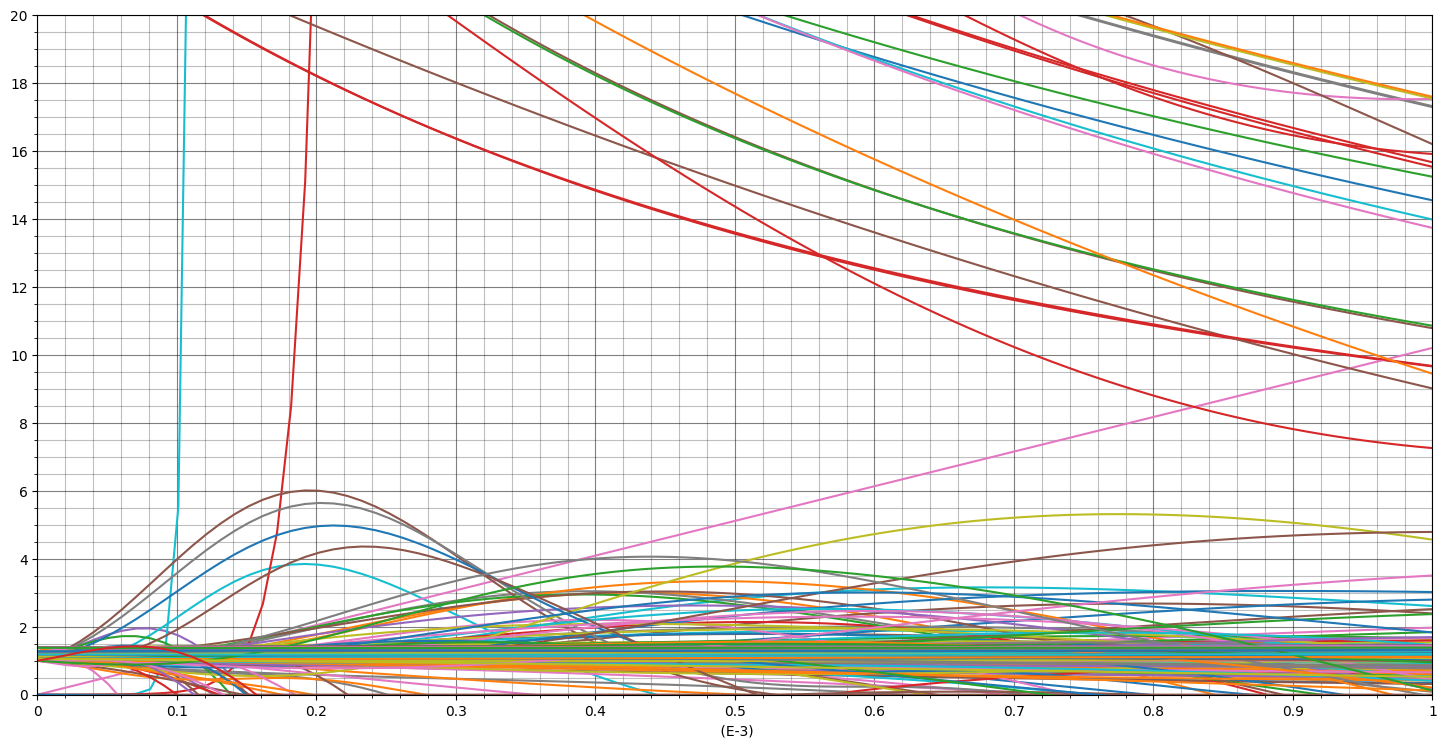

In [54]:
canvas.show()

In [ ]:
ts, vals = simulate(simulator.X[0], 10000)
window.plot.line(
    Data(ts, label = 'Dimensionless time'),
    Data(vals[:, 0], label = 'Nusselt number', lims = (None, 20)),
    size = (12, 4)
    )

In [ ]:
Image('figs/ms98a1f1.png')

In [ ]:
sims = []
for _ in range(100):
    i = np.random.randint(X.shape[0])
    sim = simulate(X[i], 100000)
    sims.append(sim)
    print('.')

In [ ]:
canvas = window.Canvas(size = (18, 9))
ax = canvas.make_ax()
for t, vals in sims:
    Nu = vals[:, 0]
    ax.line(
        t,
        np.log10(Nu),
        alpha = 0.5
        )
canvas.show()

In [ ]:
sampleNu = sims[0][1][:, 0]

In [ ]:
sampleNu.shape

In [ ]:
dataNu = Data(sampleNu, lims = (None, 10.2))

In [ ]:
dataNu.data.shape